In [1]:
import pandas as pd
import numpy as np
import os
os.sys.path.append("./") 

from pathlib import Path
from src.utils import *
from src.arg_parser import *
from src.mlib import *

## Set Environment

In [2]:
i = 2
tag = f"test{i}"
indir = "example_data/input/GISAID_total.csv"
outdir = f"example_data/output/GISAID_{tag}"
Path(outdir).mkdir(parents=True, exist_ok=True)

info = set_env(input = indir, output = outdir)

## Load Data

In [4]:
gisaid_data = pd.read_csv(indir)

In [5]:
gisaid_data

,Position,Frequency,Percentage,Entropy,H-score
0,1,1590,0.007088,1.505823,1.047783
1,2,1007,0.004489,1.494709,0.740711
2,3,975,0.004347,1.476319,0.715176
3,4,1741,0.007761,1.401635,1.062019
4,5,1314,0.005858,1.462576,0.892773
...,...,...,...,...,...
29898,29899,174,0.000776,1.408897,0.149631
29899,29900,154,0.000687,1.295297,0.122905
29900,29901,66,0.000294,1.575992,0.065393
29901,29902,64,0.000285,1.580312,0.063624


## Run Mutclust

In [6]:
init(gisaid_data, info)


--- Configurations ---
Input data: 'example_data/input/GISAID_total.csv' (29903, 5)
Output dir: 'example_data/output/GISAID_test2'
Parameters:
  Min Eps=5
  Max Eps=1000
  Min per_sum=0.0
  Eps scaling factor=10.0
  Expansion diminishing factor=3
  Min cluster length=10
----------------------



#### Find candidate core mutations (CCMs)

In [7]:
total_mutInfo, ccm_index = get_candidate_core_mutations(gisaid_data, info, tag, i)

Searching candidate core mutations...


#### Find mutation hotspots

In [8]:
clusters = dynaclust(total_mutInfo, ccm_index, info, tag, i)

Perfoming dynamic clustering...
1990 clusters found
merging clusters...
merged_clusters : 477


## Check results

#### CCMs

In [9]:
ccms = pd.read_csv(f"{outdir}/ccm_results_{tag}.tsv",sep="\t")

In [10]:
ccms

,index,Position,Frequency,Percentage,Entropy,H-score,length,freq_sum,freq_avr,per_sum,...,ent_sum,ent_avr,H-score_sum,H-score_avr,eps_scaler,left_distance,right_distance,l_pos,r_pos,mut_n
0,11,277,86,0.000383,0.607885,0.033237,12,1476,123.000000,0.006580,...,6.254088,0.521174,0.158778,0.013232,1,5,5,272,282,11
1,18,284,59,0.000263,0.994813,0.037263,12,463,38.583333,0.002064,...,8.924466,0.743705,0.174513,0.014543,1,5,5,279,289,12
2,71,337,953,0.004248,0.145834,0.086725,12,1994,166.166667,0.008889,...,4.425765,0.368814,0.174511,0.014543,1,5,5,332,342,8
3,77,343,121,0.000539,0.606729,0.046460,12,2468,205.666667,0.011002,...,4.618038,0.384837,0.290510,0.024209,1,5,5,338,348,7
4,78,344,207,0.000923,0.742291,0.095585,12,2488,207.333333,0.011091,...,3.998656,0.333221,0.285341,0.023778,1,5,5,339,349,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,29362,29628,651,0.002902,1.075911,0.392035,42,9153,217.928571,0.040804,...,18.160152,0.432385,0.974716,0.023208,4,20,20,29608,29648,26
1986,29379,29645,3313,0.014769,0.088155,0.176576,22,5935,269.772727,0.026458,...,12.475667,0.567076,0.430374,0.019562,2,10,10,29635,29655,15
1987,29382,29648,899,0.004008,0.183229,0.102232,22,6022,273.727273,0.026846,...,11.804253,0.536557,0.451155,0.020507,2,10,10,29638,29658,16
1988,29393,29659,294,0.001311,0.162326,0.030372,12,511,42.583333,0.002278,...,8.587296,0.715608,0.127386,0.010616,1,5,5,29654,29664,11


#### Mutation hotspots

In [11]:
hotspots = pd.read_csv(f"{outdir}/clusters_{tag}.txt",sep="\t")

In [12]:
hotspots

,left_position,right_position,length,mut_positions
0,272,290,19,"272,273,274,275,277,278,279,280,281,282,283,28..."
1,332,347,16,"332,334,335,336,337,338,341,343,344,345,346,347"
2,358,392,35,"358,360,361,362,363,364,365,366,367,368,369,37..."
3,433,448,16,"433,435,436,437,438,439,440,441,442,443,444,44..."
4,482,495,14,"482,483,485,487,488,489,490,491,493,495"
...,...,...,...,...
472,29568,29577,10,"29568,29570,29571,29572,29573,29574,29575,29577"
473,29581,29599,19,"29581,29583,29584,29585,29586,29587,29588,2958..."
474,29613,29633,21,"29613,29615,29616,29617,29618,29619,29620,2962..."
475,29640,29651,12,"29640,29641,29643,29645,29647,29648,29649,2965..."


#### Visualization

<Figure size 1200x800 with 0 Axes>

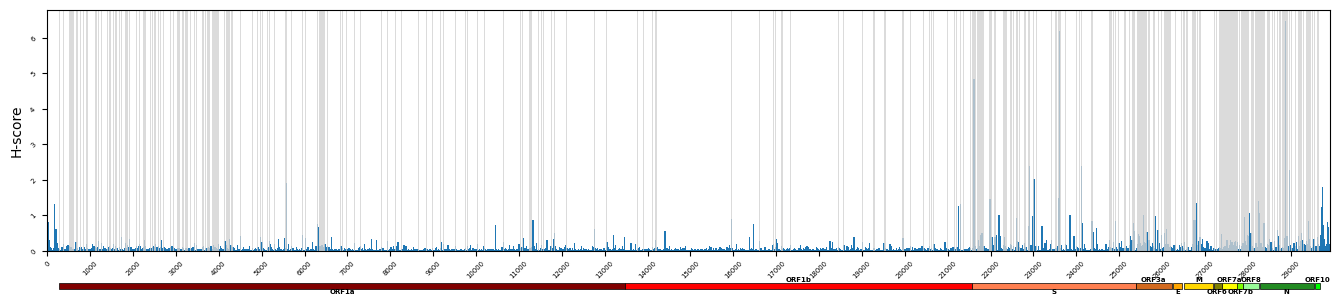

In [13]:
output_file = f"{outdir}/bedgraph_{tag}.png"
make_bedgraph(gisaid_data, hotspots, output_file)